In [10]:
# Generated SAR benchmark dataset example at a glance
import xarray as xr

In [39]:
# read a generated SAR benchmark dataset .nc file, see seven examples in https://surfdrive.surf.nl/files/index.php/s/lTlsfGNFU6wpm7N
ds=xr.open_dataset('Groningen_netcdf_20220109_full_attributes.nc')

In [40]:
# show the dataset structure 
print(ds)

<xarray.Dataset>
Dimensions:                                     (lines (azimuth): 2350,
                                                 pixels (range): 940)
Dimensions without coordinates: lines (azimuth), pixels (range)
Data variables: (12/16)
    VV amplitude (linear)                       (lines (azimuth), pixels (range)) float32 ...
    VH amplitude (linear)                       (lines (azimuth), pixels (range)) float32 ...
    VV interferometric phase (radians)          (lines (azimuth), pixels (range)) float32 ...
    VV coherence                                (lines (azimuth), pixels (range)) float32 ...
    Intensity summation                         (lines (azimuth), pixels (range)) float32 ...
    Intensity difference (dual-pol difference)  (lines (azimuth), pixels (range)) float32 ...
    ...                                          ...
    Buildings                                   (lines (azimuth), pixels (range)) float64 ...
    Railways                              

In [13]:
#show the dataset variables 
print(ds.variables)

Frozen({'VV amplitude (linear)': <xarray.Variable (lines (azimuth): 2350, pixels (range): 940)>
[2209000 values with dtype=float32]
Attributes:
    Units:        voltage [linear]
    Format:       float32
    Description:  the absolute value of every complex number in VV channel, 'VH amplitude (linear)': <xarray.Variable (lines (azimuth): 2350, pixels (range): 940)>
[2209000 values with dtype=float32]
Attributes:
    Units:        voltage [linear]
    Format:       float32
    Description:  the absolute value of every complex number in VH channel, 'VV interferometric phase (radians)': <xarray.Variable (lines (azimuth): 2350, pixels (range): 940)>
[2209000 values with dtype=float32]
Attributes:
    Units:        radians
    Format:       float32
    Range:        between -pi and +pi
    Description:  phase difference between master and slave acquisition, 'VV coherence': <xarray.Variable (lines (azimuth): 2350, pixels (range): 940)>
[2209000 values with dtype=float32]
Attributes:
    Uni

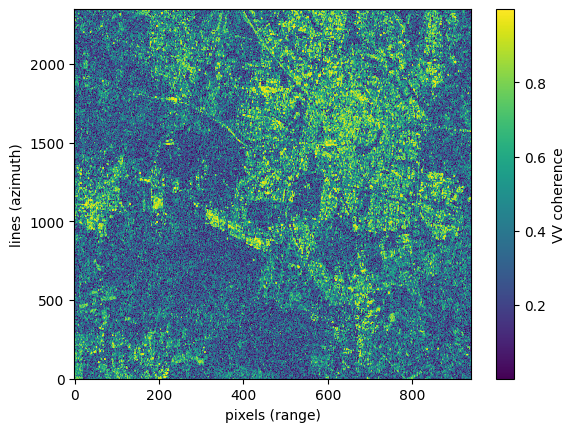

In [14]:
# plot coherence map in VV mode
ds['VV coherence'].plot()

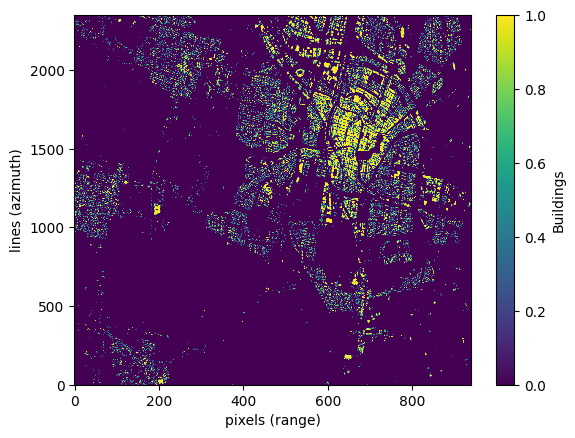

In [15]:
# plot buildings class map
ds['Buildings'].plot()

In [31]:
# conda install -c conda-forge gdal
# test stac scripts https://github.com/AlignSAR/alignSAR/tree/main/alignsar/stac
from osgeo import gdal

In [32]:
!gdalinfo Groningen_netcdf_20220109_full_attributes.nc

Driver: netCDF/Network Common Data Format
Files: Groningen_netcdf_20220109_full_attributes.nc
Size is 512, 512
Metadata:
  NC_GLOBAL#creator_email=x.zhang-7@utwente.nl
  NC_GLOBAL#creator_name=Xu Zhang
  NC_GLOBAL#creator_url=https://research.utwente.nl/en/persons/xu-zhang
  NC_GLOBAL#date_created=2023-09-23
  NC_GLOBAL#geospatial_lat_max=53.45763298862386
  NC_GLOBAL#geospatial_lat_min=53.108846741824934
  NC_GLOBAL#geospatial_lon_max=6.8439575842848654
  NC_GLOBAL#geospatial_lon_min=5.376860616873864
  NC_GLOBAL#institution=UT
  NC_GLOBAL#processing_level=L1
  NC_GLOBAL#project=ESA Open SAR Library
  NC_GLOBAL#publisher_email=alignsar.project@gmail.com
  NC_GLOBAL#publisher_name=AlignSAR
  NC_GLOBAL#publisher_url=alignsar.nl
  NC_GLOBAL#sar_absolute_orbit=41737
  NC_GLOBAL#sar_burst=1,2
  NC_GLOBAL#sar_date_time=2022-02-02
  NC_GLOBAL#sar_instrument_mode=IW
  NC_GLOBAL#sar_looks_azimuth=1
  NC_GLOBAL#sar_looks_range=1
  NC_GLOBAL#sar_master_date_time=20220214
  NC_GLOBAL#sar_pixel_sp

In [33]:
# to generate the necessary commands to create GeoTIFF files, which followed the following pattern: 
# gdal_translate -ot Float32 "NETCDF:<input.nc>:<variable_name>" <output.tif>
!python3 convert.py Groningen_netcdf_20220109_full_attributes.nc

gdal_translate -ot Float32 "NETCDF:Groningen_netcdf_20220109_full_attributes.nc:VV amplitude (linear)" vv-amplitude.tif
gdal_translate -ot Float32 "NETCDF:Groningen_netcdf_20220109_full_attributes.nc:VH amplitude (linear)" vh-amplitude.tif
gdal_translate -ot Float32 "NETCDF:Groningen_netcdf_20220109_full_attributes.nc:VV interferometric phase (radians)" vv-interferometric-phase.tif
gdal_translate -ot Float32 "NETCDF:Groningen_netcdf_20220109_full_attributes.nc:VV coherence" vv-coherence.tif
gdal_translate -ot Float32 "NETCDF:Groningen_netcdf_20220109_full_attributes.nc:Intensity summation" intensity-summation.tif
gdal_translate -ot Float32 "NETCDF:Groningen_netcdf_20220109_full_attributes.nc:Intensity difference (dual-pol difference)" intensity-difference.tif
gdal_translate -ot Float32 "NETCDF:Groningen_netcdf_20220109_full_attributes.nc:Intensity ratio (dual-pol power ratio)" intensity-ratio.tif
gdal_translate -ot Float32 "NETCDF:Groningen_netcdf_20220109_full_attributes.nc:Cross-pol 

In [34]:
# examples
!gdal_translate -ot Float32 "NETCDF:Groningen_netcdf_20220109_full_attributes.nc:VV coherence" VV_coherence.tif
!gdal_translate -ot Float32 "NETCDF:Groningen_netcdf_20220109_full_attributes.nc:Buildings" Buildings.tif

Input file size is 940, 2350
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 940, 2350
0...10...20...30...40...50...60...70...80...90...100 - done.


In [35]:
!gdal_translate -ot Float32 "NETCDF:Groningen_netcdf_20220109_full_attributes.nc:Lon" lon.tif
!gdal_translate -ot Float32 "NETCDF:Groningen_netcdf_20220109_full_attributes.nc:Lat" lat.tif

Input file size is 940, 2350
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 940, 2350
0...10...20...30...40...50...60...70...80...90...100 - done.


In [36]:
#generate ground control points gcps.csv. To extract the coordinates. Extracted GCPs were stored as a separate CSV file for each NetCDF file
!python3 gcps.py lon.tif lat.tif 10 10


Reading longitude grid...
Reading latitude grid...
Grid size 940 x 2350
Point grid size 11 x 10


In [37]:
!python3 points.py

In [30]:
# to generate the necessary commands to create georeferenced COG files, which followed the following pattern for each file:
# gdal_translate -strict -of GTiff -a_srs EPSG:4326 -stats <GCPs> <input.tif> <temp.tif>
# gdalwrap -r near -of COG -t_srs EPSG:4326 <temp.tif> <output.tif> 
# By running the generated commands, all AlignSAR data files were converted to cloud-native COG format suitable for creating the STAC catalog.
!python3 georeference.py Groningen_netcdf_20220109_full_attributes.nc

gdal_translate -strict -of GTiff -a_srs EPSG:4326 -stats  -gcp 0.5 0.5 6.634262 53.143169 -gcp 104.5 0.5 6.630118 53.155930 -gcp 208.5 0.5 6.626060 53.168701 -gcp 312.5 0.5 6.621922 53.181461 -gcp 416.5 0.5 6.618027 53.194252 -gcp 520.5 0.5 6.613863 53.207008 -gcp 624.5 0.5 6.609757 53.219776 -gcp 728.5 0.5 6.605667 53.232540 -gcp 832.5 0.5 6.601552 53.245304 -gcp 936.5 0.5 6.597474 53.258072 -gcp 939.5 0.5 6.597356 53.258442 -gcp 0.5 261.5 6.618892 53.141426 -gcp 104.5 261.5 6.614756 53.154190 -gcp 208.5 261.5 6.610770 53.166969 -gcp 312.5 261.5 6.606589 53.179726 -gcp 416.5 261.5 6.602440 53.192486 -gcp 520.5 261.5 6.598365 53.205254 -gcp 624.5 261.5 6.594328 53.218025 -gcp 728.5 261.5 6.590226 53.230793 -gcp 832.5 261.5 6.586150 53.243561 -gcp 936.5 261.5 6.582001 53.256321 -gcp 939.5 261.5 6.581888 53.256691 -gcp 0.5 522.5 6.603331 53.139660 -gcp 104.5 522.5 6.599221 53.152424 -gcp 208.5 522.5 6.595146 53.165195 -gcp 312.5 522.5 6.591182 53.177975 -gcp 416.5 522.5 6.587200 53.19075

In [ ]:
# see STAC catalog examples on webpage https://radiantearth.github.io/stac-browser/#/?.language=en, 
# enter https://data.crib.utwente.nl/stac/alignsar/catalog.json for 'Please specify a STAC Catalog or API'